In [3]:
import pandas as pd
import numpy as np

# from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

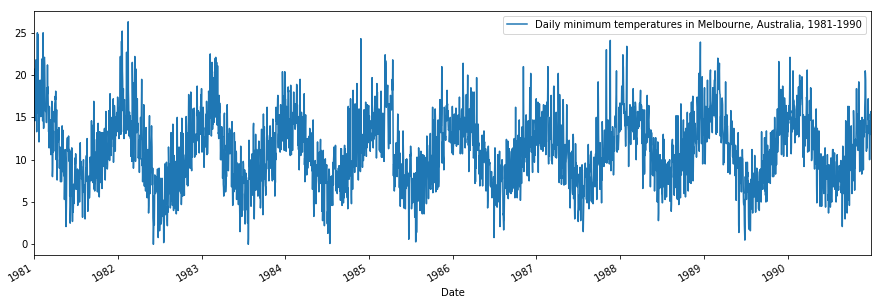

In [6]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'

df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(figsize=(15,5));

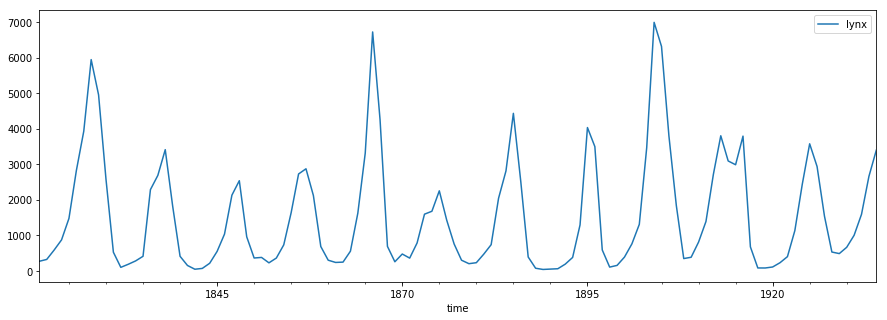

In [8]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'

df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df.plot(figsize=(15,5));

In [11]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

df = pd.read_csv(path)
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [16]:
#próbujemy się dostać do kolumn dzień, miesiąc, rok przy pomocy lambdy
#z floata (1974.0) robimy inty (1974) przy pomocy int
#scalamy trzy kolumny (dzień, miesiąc, rok) do jednego stringa:
#(1974, 5, 19) => 1974-05-19 (przy pomocy '{}-{}-{}'.format())
df['date'] = df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)

In [19]:
#sprawdzamy typ (string == object)
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null object
dtypes: object(1)
memory usage: 18.2+ KB


In [20]:
#zmiana na format daty datetime
df['date'] = pd.to_datetime(df['date'])
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.2 KB


In [21]:
df.index = df['date']

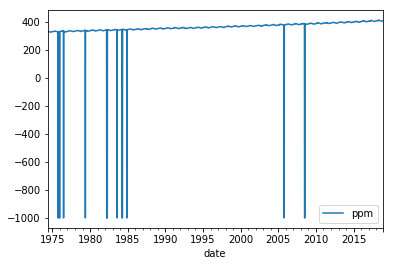

In [22]:
df[['ppm']].plot();
#kreski na wykresie to tzw. outlayery = braki danych/pomiarów kiedy wpisywane było cokolwiek

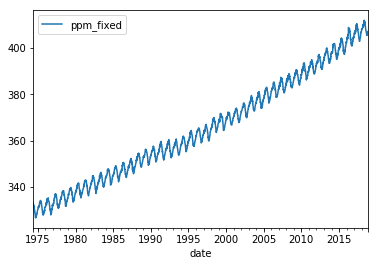

In [25]:
#czyścimy wykres z tych kresek
#przechodzimy przez wszystkie wartości ppm, zwróc 'nan' kiedy x jest mniejszy od 0, w przeciwnym razie zwróć x
#backfill -> uzupełnia nam te dziury danymi, które występują najbliżej

df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna(method='backfill')
df[['ppm_fixed']].plot();

#widoczny trend, sezon roczny

In [26]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
date,,,,,,,,,,,
1974-05-19,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19,333.34
1974-05-26,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26,332.95
1974-06-02,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02,332.32
1974-06-09,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09,332.18
1974-06-16,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16,332.37


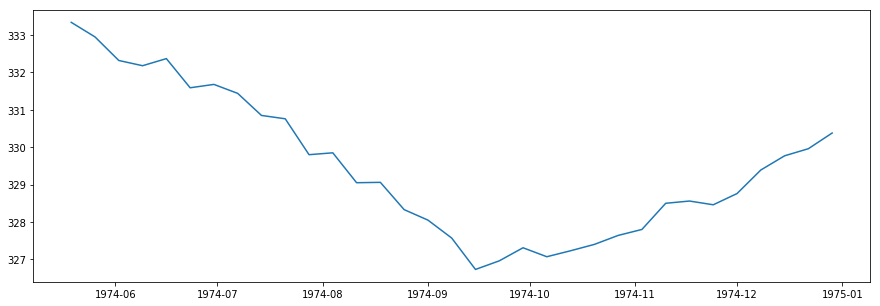

In [38]:
#robimy podzbiór dla roku 1974
plt.figure(figsize=(15,5))
df1974 = df[df.year == 1974]
plt.plot(df1974.index, df1974.ppm_fixed);

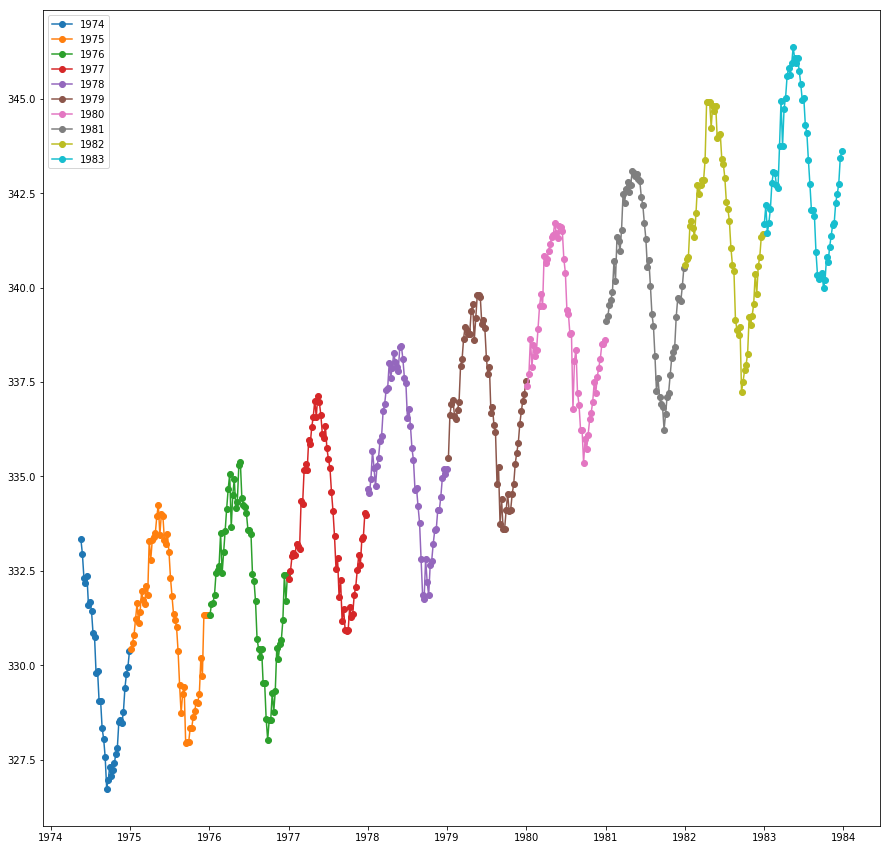

In [42]:
plt.figure(figsize=(15,15))
for year in range(1974, 1984):
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year.ppm_fixed, 'o-', label=year);
    
plt.legend();